In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [2]:
# Training period: Feb 21st - Feb 23rd
with open('training.json', 'r', encoding='UTF-8') as f:
    training = json.load(f)

In [3]:
TRN = ['name', 'code', 'time', 'price', 'time_1', 'price_1', 'price_dif_1', 'sell_1', 'buy_1', 'volume_1', \
       'variation_1', 'post_num_1', 'unique_id_1', 'click_1', 'like_1', 'dislike_1', 'time_2', 'price_2', \
       'price_dif_2', 'sell_2', 'buy_2', 'volume_2', 'variation_2', 'post_num_2', 'unique_id_2', 'click_2', \
       'like_2', 'dislike_2', 'time_3', 'price_3', 'price_dif_3', 'sell_3', 'buy_3', 'volume_3', 'variation_3', \
       'post_num_3', 'unique_id_3', 'click_3', 'like_3', 'dislike_3', 'mkt_cap', 'kospi', 'kosdaq', 'trash', \
       'yesterday_closing_price', 'is_maximum', 'is_minimum', 'price_volatility', 'price_trend', \
       'average_price_volatility', 'sell_minus_buy_1', 'sell_minus_buy_2', 'sell_minus_buy_3', \
       'is_price_gap_stable', 'price_gap_volatility', 'is_like_higher', 'volume_trend', 'post_num_trend', \
       'unique_id_trend', 'click_trend', 'price_increase', 'did_price_increase', 'did_price_033', \
       'did_price_100', 'did_price_150', 'kospi_ind', 'kosdaq_ind', 'time_slot', 'ko_inter', 'early_mor', \
       'morning', 'lunch', 'afternoon', 'late', 'mkt_change', 'alpha', 'per_now', 'did_opening_price_increase', \
       'price_sq', 'price_1_sq', 'price_dif_1_sq', 'sell_1_sq', 'buy_1_sq', 'volume_1_sq', 'variation_1_sq', \
       'post_num_1_sq', 'unique_id_1_sq', 'click_1_sq', 'like_1_sq', 'dislike_1_sq', 'price_2_sq', \
       'price_dif_2_sq', 'sell_2_sq', 'buy_2_sq', 'volume_2_sq', 'variation_2_sq', 'post_num_2_sq', \
       'unique_id_2_sq', 'click_2_sq', 'like_2_sq', 'dislike_2_sq', 'price_3_sq', 'price_dif_3_sq', \
       'sell_3_sq', 'buy_3_sq', 'volume_3_sq', 'variation_3_sq', 'post_num_3_sq', 'unique_id_3_sq', \
       'click_3_sq', 'like_3_sq', 'dislike_3_sq', 'mkt_cap_sq', 'kospi_sq', 'kosdaq_sq', 'trash_sq', \
       'yesterday_closing_price_sq', 'is_maximum_sq', 'is_minimum_sq', 'price_volatility_sq', 'price_trend_sq', \
       'average_price_volatility_sq', 'sell_minus_buy_1_sq', 'sell_minus_buy_2_sq', 'sell_minus_buy_3_sq', \
       'is_price_gap_stable_sq', 'price_gap_volatility_sq', 'is_like_higher_sq', 'volume_trend_sq', \
       'post_num_trend_sq', 'unique_id_trend_sq', 'click_trend_sq', 'price_increase_sq', 'did_price_increase_sq', \
       'did_price_033_sq', 'did_price_100_sq', 'did_price_150_sq', 'kospi_ind_sq', 'kosdaq_ind_sq', 'time_slot_sq', \
       'early_mor_sq', 'morning_sq', 'lunch_sq', 'afternoon_sq', 'late_sq', 'mkt_change_sq', 'alpha_sq', \
       'per_now_sq', 'did_opening_price_increase_sq']

In [4]:
training_df = pd.DataFrame(training, columns=TRN)

In [5]:
DEL = ['time_2','code','time_3','did_price_increase','did_price_033_sq','price_sq','time_1','price_increase',
       'price','did_price_100','name','did_price_150','did_price_increase_sq','price_increase_sq',
       'did_price_150_sq','time','did_price_100_sq','did_price_033']
X = [var for var in TRN if var not in DEL]

In [6]:
# Tuning parameters
MAX_DEPTH = 6
MIN_SAMPLES = 100

In [7]:
X_train = training_df[X].as_matrix()
y_train = training_df[["did_price_033"]].as_matrix()

df_tree = DecisionTreeClassifier(max_depth=MAX_DEPTH, min_samples_leaf=MIN_SAMPLES)
df_tree.fit(X_train, y_train)
df_tree_viz = export_graphviz(df_tree, out_file=None, feature_names=X, rounded=True, filled=True)

graph = graphviz.Source(df_tree_viz)

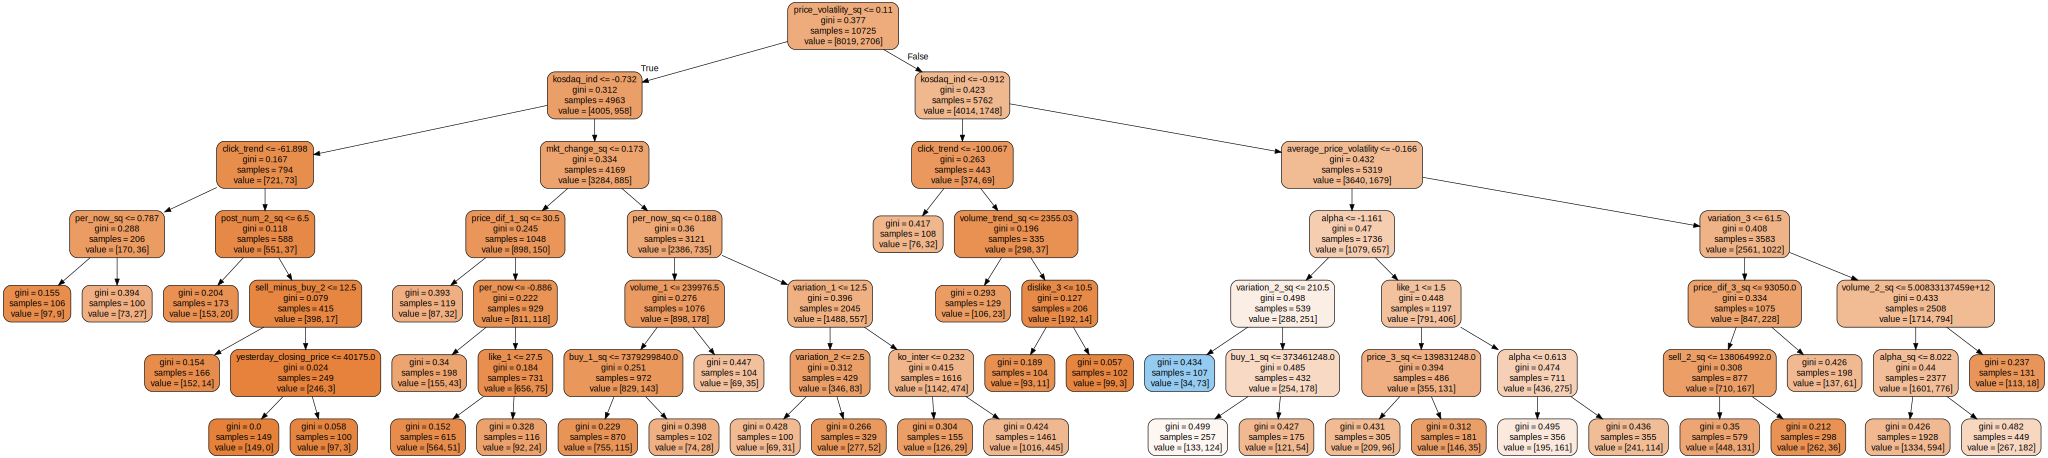

In [8]:
graph

In [9]:
# Testing period: Feb 26th - Mar 7th
with open('testing.json', 'r', encoding='UTF-8') as f:
    testing = json.load(f)

In [10]:
TST = ['index', 'name', 'code', 'time', 'price', 'time_1', 'price_1', 'price_dif_1', 'sell_1', 'buy_1', \
       'volume_1', 'variation_1', 'post_num_1', 'unique_id_1', 'click_1', 'like_1', 'dislike_1', \
       'time_2', 'price_2', 'price_dif_2', 'sell_2', 'buy_2', 'volume_2', 'variation_2', 'post_num_2', \
       'unique_id_2', 'click_2', 'like_2', 'dislike_2', 'time_3', 'price_3', 'price_dif_3', 'sell_3', 'buy_3', \
       'volume_3', 'variation_3', 'post_num_3', 'unique_id_3', 'click_3', 'like_3', 'dislike_3', 'mkt_cap', \
       'kospi', 'kosdaq', 'trash', 'yesterday_closing_price', 'is_maximum', 'is_minimum', 'price_volatility', \
       'price_trend', 'average_price_volatility', 'sell_minus_buy_1', 'sell_minus_buy_2', 'sell_minus_buy_3', \
       'is_price_gap_stable', 'price_gap_volatility', 'is_like_higher', 'volume_trend', 'post_num_trend', \
       'unique_id_trend', 'click_trend', 'price_increase', 'did_price_increase', 'did_price_033', \
       'did_price_100', 'did_price_150', 'kospi_ind', 'kosdaq_ind', 'time_slot', 'ko_inter', 'early_mor', \
       'morning', 'lunch', 'afternoon', 'late', 'mkt_change', 'alpha', 'per_now', 'kospi_1', 'kospi_2', \
       'kospi_3', 'kospi_answer', 'kosdaq_1', 'kosdaq_2', 'kosdaq_3', 'kosdaq_answer', 'kospi_trend', \
       'kosdaq_trend', 'kospi_increase', 'kosdaq_increase', 'market_increase', 'did_opening_price_increase', \
       'price_1_sq', 'price_dif_1_sq', 'sell_1_sq', 'buy_1_sq', 'volume_1_sq', 'variation_1_sq', 'post_num_1_sq', \
       'unique_id_1_sq', 'click_1_sq', 'like_1_sq', 'dislike_1_sq', 'price_2_sq', 'price_dif_2_sq', 'sell_2_sq', \
       'buy_2_sq', 'volume_2_sq', 'variation_2_sq', 'post_num_2_sq', 'unique_id_2_sq', 'click_2_sq', 'like_2_sq', \
       'dislike_2_sq', 'price_3_sq', 'price_dif_3_sq', 'sell_3_sq', 'buy_3_sq', 'volume_3_sq', 'variation_3_sq', \
       'post_num_3_sq', 'unique_id_3_sq', 'click_3_sq', 'like_3_sq', 'dislike_3_sq', 'mkt_cap_sq', \
       'yesterday_closing_price_sq', 'price_volatility_sq', 'price_trend_sq', 'average_price_volatility_sq', \
       'sell_minus_buy_1_sq', 'sell_minus_buy_2_sq', 'sell_minus_buy_3_sq', 'price_gap_volatility_sq', \
       'volume_trend_sq', 'post_num_trend_sq', 'unique_id_trend_sq', 'click_trend_sq', 'kospi_ind_sq', \
       'kosdaq_ind_sq', 'time_slot_sq', 'ko_inter_sq', 'mkt_change_sq', 'alpha_sq', 'per_now_sq', 'kospi_1_sq', \
       'kospi_2_sq', 'kospi_3_sq', 'kosdaq_1_sq', 'kosdaq_2_sq', 'kosdaq_3_sq', 'kospi_trend_sq', \
       'kosdaq_trend_sq', 'KNN', 'PLS', 'Logistic', 'Random Forest', 'Bagging', 'Boosting', 'PCR', 'Tree']

In [11]:
testing_df = pd.DataFrame(testing, columns=TST)

In [12]:
testing_df["Tree"] = ((testing_df["price_volatility_sq"] > 0.5) \
                      & (testing_df["average_price_volatility"] <= 0) \
                      & (testing_df["alpha"] <= -1) \
                      & (testing_df["variation_2_sq"] <= 200)).astype(int)

In [13]:
gb = pd.DataFrame(testing_df.groupby("time")[["kospi_answer", "kosdaq_answer"]].mean())
starting = "2018-02-26 11:30"
predicting = starting[:-5] + str(int(starting[-5:-3]) + 1) + starting[-3:]

In [14]:
init = gb[0:1]
init = init.set_index([[starting]])
init["kospi_answer"] = testing_df[testing_df["time_3"] == starting].iloc[0]["kospi_3"]
init["kosdaq_answer"] = testing_df[testing_df["time_3"] == starting].iloc[0]["kosdaq_3"]

In [15]:
gb = pd.concat([init, gb[gb.reset_index()[gb.reset_index()["time"] == \
                                          predicting].index.tolist()[0]:]])

In [16]:
gb["Tree_increase"] = 1 + (testing_df[testing_df["Tree"] == 1\
                             ].groupby("time")["price_increase"].mean())/100
gb["Tree_balance"] = np.nan
gb["Tree_balance"].loc[starting] = 100

c = 0
for t, row in gb.iterrows():
    if c > 0:
        if np.isnan(row["Tree_increase"]):
            row["Tree_balance"] = gb["Tree_balance"].iloc[c-1]

        else:
            buying_amount = gb["Tree_balance"].iloc[c-1]
            buying_fee = buying_amount * 0.00015

            selling_amount = buying_amount * row["Tree_increase"]
            selling_fee = selling_amount * 0.00315

            balance = selling_amount - buying_fee - selling_fee
            row["Tree_balance"] = balance
    c += 1

In [17]:
gb["KOSPI_balance"] = 100 * gb["kospi_answer"] / \
                          gb["kospi_answer"].iloc[0]
gb["KOSDAQ_balance"] = 100 * gb["kosdaq_answer"] / \
                       gb["kosdaq_answer"].iloc[0]
gb["KOSPI_balance"].iloc[len(gb) - 1] = gb["KOSPI_balance"].iloc[len(gb) \
                                        - 1] * (1-0.00315) - 0.015
gb["KOSDAQ_balance"].iloc[len(gb) - 1] = \
            gb["KOSDAQ_balance"].iloc[len(gb) - 1] * (1-0.00315) - 0.015

In [18]:
gb

,kospi_answer,kosdaq_answer,Tree_increase,Tree_balance,KOSPI_balance,KOSDAQ_balance
2018-02-26 11:30,2456.33,880.72,NaN,100.000000,100.000000,100.000000
2018-02-26 12:30,2457.12,879.17,1.002725,99.941621,100.032162,99.824008
2018-02-26 12:40,2454.75,878.66,NaN,99.941621,99.935676,99.766100
2018-02-26 12:50,2453.32,878.79,NaN,99.941621,99.877459,99.780861
2018-02-26 13:00,2454.81,878.27,NaN,99.941621,99.938119,99.721819
2018-02-26 13:10,2452.62,876.98,NaN,99.941621,99.848962,99.575347
2018-02-26 13:20,2453.88,876.94,NaN,99.941621,99.900258,99.570806
2018-02-26 13:30,2454.42,876.26,NaN,99.941621,99.922242,99.493596
2018-02-26 13:40,2453.26,874.73,NaN,99.941621,99.875017,99.319875
2018-02-26 13:50,2454.10,874.97,NaN,99.941621,99.909214,99.347125


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3240: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


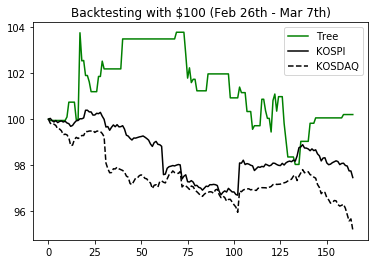

In [19]:
result = pd.DataFrame({"x": range(0, 165), \
                       "y1": gb["Tree_balance"], \
                       "y2": gb["KOSPI_balance"], \
                       "y3": gb["KOSDAQ_balance"]})

plt.title("Backtesting with $100 (Feb 26th - Mar 7th)")
plt.plot( 'x', 'y1', data=result, marker='', color='green', linestyle='solid', label="Tree")
plt.plot( 'x', 'y2', data=result, marker='', color='black', linestyle='solid', label="KOSPI")
plt.plot( 'x', 'y3', data=result, marker='', color='black', linestyle='dashed', label="KOSDAQ")
plt.legend()
plt.show()

In [20]:
print("* Market average")
print("possible trading:", len(testing_df))
print("expected return:", testing_df["price_increase"].mean())

print("\n* Tree model")
print("number of trades:", len(testing_df[testing_df["Tree"] == 1]))
print("expected return:", testing_df[testing_df["Tree"] == 1]["price_increase"].mean())

* Market average
possible trading: 10982
expected return: -0.12108980638104132

* Tree model
number of trades: 58
expected return: 0.26178918947931035
